# Violin Plots

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load dataset
fuel_econ = pd.read_csv("data/fuel_econ.csv")
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Violin plot for plotting a Quantitative variable (fuel efficiency) versus Qualitative variable (vehicle class)

In [3]:
fuel_econ['VClass'].value_counts()

Midsize Cars        1188
Compact Cars        1122
Subcompact Cars      673
Large Cars           625
Minicompact Cars     321
Name: VClass, dtype: int64

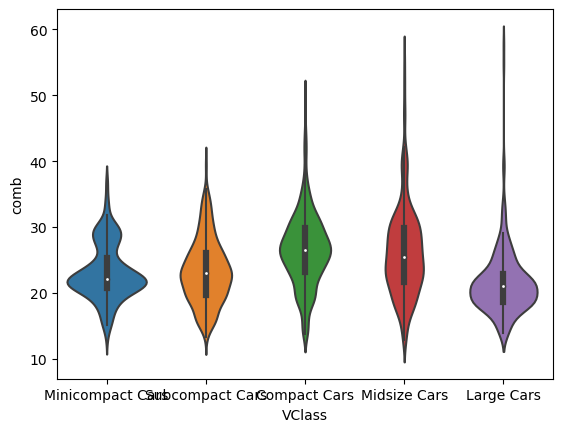

In [4]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/docs/reference/api/pandas.CategoricalDtype.html
vclasses = pd.CategoricalDtype(categories=sedan_classes, ordered=True)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

sns.violinplot(data=fuel_econ, x='VClass', y='comb');

### Violin plot without datapoints in the violin interior

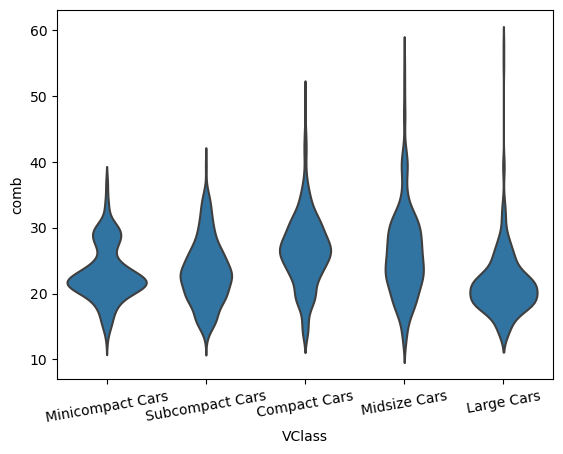

In [5]:
# The "inner" argument represents the datapoints in the violin interior.
sns.violinplot(data=fuel_econ, x='VClass', y='comb',
               color=sns.color_palette()[0], inner=None)
plt.xticks(rotation=10);

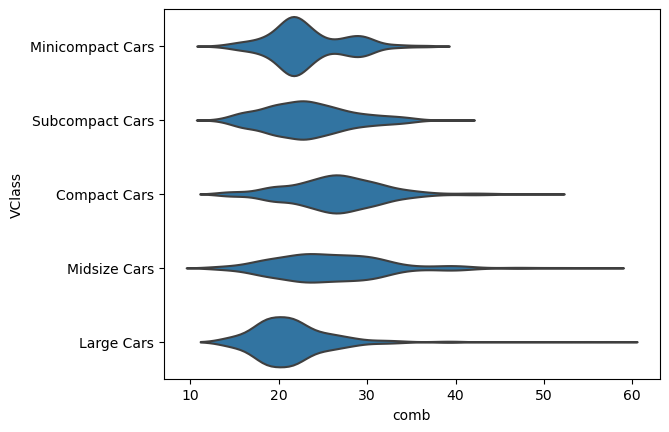

In [6]:
# The "inner" argument represents the datapoints in the violin interior.
sns.violinplot(data=fuel_econ, y='VClass', x='comb',
               color=sns.color_palette()[0], inner=None);

# Box Plots

In [11]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Violin versus Box plot

Comparison between violin and box plot.


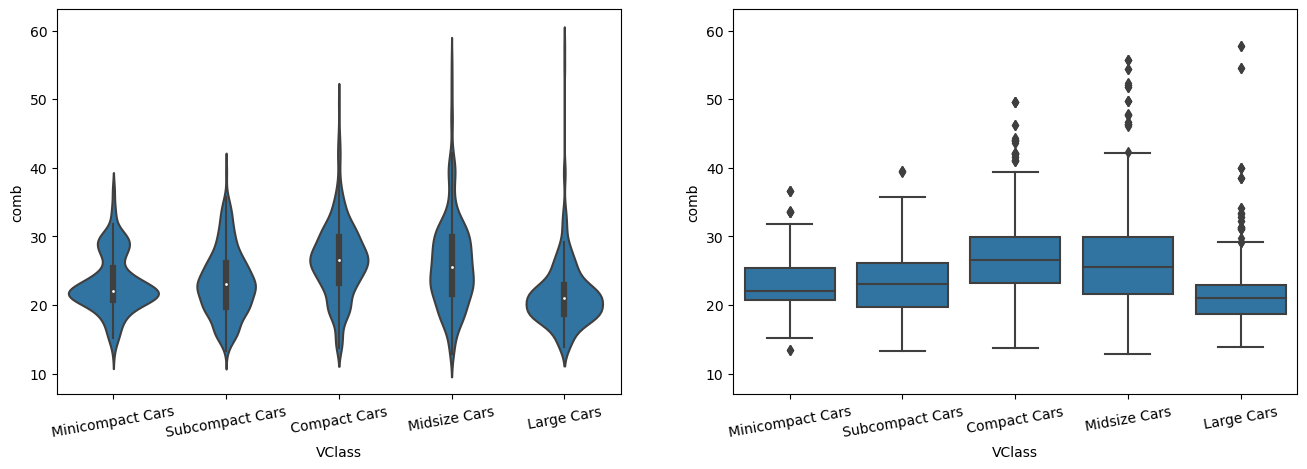

In [29]:
# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
vclasses = pd.CategoricalDtype(categories=sedan_classes, ordered=True)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

plt.figure(figsize=[16, 5])
base_color = sns.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
# Let's return the axes object
ax1 = sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=10)

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=10)
plt.ylim(ax1.get_ylim());  # set y-axis limits to be same as left plot
print("Comparison between violin and box plot.")

Comparing the two plots, the box plot is a cleaner summary of the data than the violin plot. It's easier to compare statistics between the groups with a box plot. This makes a box plot worth more consideration if you have a lot of groups to compare, or if you are building explanatory plots.

### Horizontal box plot

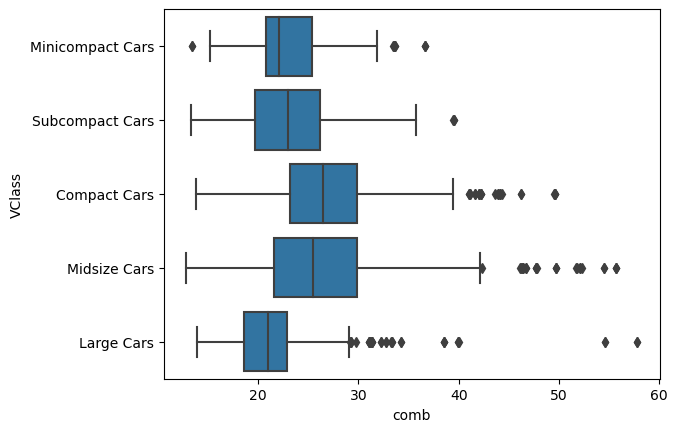

In [30]:
sns.boxplot(data=fuel_econ, x='comb', y='VClass', color=base_color);

### Violin plot with quartile information in the middle

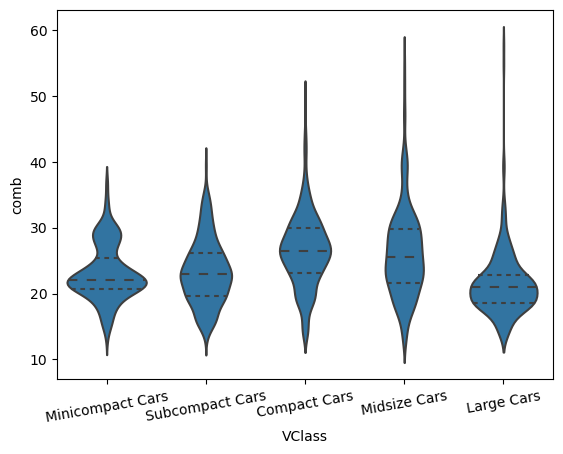

In [34]:
sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='quartile')
plt.xticks(rotation=10);